In [45]:
import numpy as np
import random

# TODO: In "for a in action[s]" add wall
# TODO: Plot delta over iteration for seeing how it smallens everytime

states = []

for i in range(3):
    for j in range(4):
        states.append((i+1, j+1))

### Create reward dictionary
rewards = {}

for state in states:
    # Green Terminal State
    if state == (1,4):
        rewards[state] = 1

    # Red Terminal State
    elif state == (2, 4):
        rewards[state] = -1

    # For all other states
    else:
        rewards[state] = 0
    
### Define actions
# U = Up, D = Down, L = Left, R = Right
actions = {
    (3, 1): ["U", "R"],             # Start state
    (1, 1): ["D", "R"],
    (1, 2): ["L", "R"],
    (1, 3): ["L", "R", "D"],
    (2, 1): ["U", "D"],             # (2, 2) is wall so we can basically ignore it here
    (2, 2): ["U", "D", "L", "R"],
    (2, 3): ["U", "R", "D"],
    (3, 2): ["L", "R"],
    (3, 3): ["L", "U", "R"],
    (3, 4): ["U", "L"]
}

### Define initial policy, here: Random
policy = {}
for state in actions.keys():
    policy[state] = np.random.choice(actions[state])

### Define Transition Probabilites
p_action = {"U": 0.3, "D": 0.1, "L": 0.1, "R": 0.5}

### Value Iteration Presetting ###
# 0th Step: Set Hyperparams
GAMMA = 0.9
THETA = 0.005
NOISE = 0.1

# 1st Step: Initialize all V(s) arbitrary
V = {}
for s in states:
    if s == (1, 4):
        V[s] = 1
    elif s == (2, 4):
        V[s] = -1
    else:
        V[s] = 0

# For Plotting
delta_records = []


def getStateFromRandomAction(a: str, s: tuple) -> tuple:
    if a == "U":
        next_state = (s[0] - 1, s[1])
        if next_state == (2, 2):
            next_state = (s[0], s[1])

    if a == "D":
        next_state = (s[0] + 1, s[1])
        if next_state == (2, 2):
            next_state = (s[0], s[1])    

    if a == "L":
        next_state = (s[0], s[1] - 1)
        if next_state == (2, 2):
            next_state = (s[0], s[1])

    if a == "R":
        next_state = (s[0], s[1] + 1)
        if next_state == (2, 2):
            next_state = (s[0], s[1])
    
    return next_state
    

# Value Iteration
numb_of_iteration = 0

while True:
    delta = 0
    for s in states:
        if s in policy:
            v_init = V[s]
            v_post = 0

            # Get next state by altering the state tuple
            # TODO: Is p_action significant here? Or is it 0.25 for each action? 
            for a in actions[s]:

                a_rand = np.random.choice([action for action in actions[s] if action != a])

                # If action is Up
                if a == "U":
                    next_state = (s[0] - 1, s[1])
                    if next_state == (2, 2):
                        next_state = (s[0], s[1])
                    v = p_action["U"] * (rewards[next_state] + GAMMA*V[next_state])
                    # Generate random number in [0, 1]
                    if random.random() < NOISE:
                        v = (NOISE) * (rewards[getStateFromRandomAction(a_rand, s)] + GAMMA*V[getStateFromRandomAction(a_rand, s)])

                # If action is Down
                if a == "D":
                    next_state = (s[0] + 1, s[1])
                    if next_state == (2, 2):
                        next_state = (s[0], s[1])
                    v = p_action["D"] * (rewards[next_state] + GAMMA*V[next_state])
                    # Generate random number in [0, 1]
                    if random.random() < NOISE:
                        v = (NOISE) * (rewards[getStateFromRandomAction(a_rand, s)] + GAMMA*V[getStateFromRandomAction(a_rand, s)])
 
                # If action is Left
                if a == "L":
                    next_state = (s[0], s[1] - 1)
                    if next_state == (2, 2):
                        next_state = (s[0], s[1])
                    v = p_action["L"] * (rewards[next_state] + GAMMA*V[next_state])
                    # Generate random number in [0, 1]
                    if random.random() < NOISE:
                        v = (NOISE) * (rewards[getStateFromRandomAction(a_rand, s)] + GAMMA*V[getStateFromRandomAction(a_rand, s)])

                # If action is Right
                if a == "R":
                    next_state = (s[0], s[1] + 1)
                    if next_state == (2, 2):
                        next_state = (s[0], s[1])
                    v = p_action["R"] * (rewards[next_state] + GAMMA*V[next_state])
                    # Generate random number in [0, 1]
                    if random.random() < NOISE:
                        v = (NOISE) * (rewards[getStateFromRandomAction(a_rand, s)] + GAMMA*V[getStateFromRandomAction(a_rand, s)])
                                    
                # If new value of v(s) is better than the old value, i.e. v_init, then keep it
                if v > v_post:
                    v_post = v
                    policy[s] = a
                
                # Print information about the variables
                print("s: {}, s': {}, a: {}, v: {}, v[s]: {}, V[s']: {}".format(s, next_state, a, v, V[s], V[next_state]))
                
            # Safe highest state value v_post in V dictionary
            V[s] = v_post
            # Calculate delta, i.e. difference between the old value and the new value
            delta = max(delta, np.abs(v_init - V[s]))

    delta_records.append(delta)                                 # Optional (for plotting)
    if delta < THETA:
        break
    numb_of_iteration += 1


#########################

print("Number of Iteration: {}".format(numb_of_iteration))
print(policy)
print(V)



s: (1, 1), s': (2, 1), a: D, v: 0.0, v[s]: 0, V[s']: 0
s: (1, 1), s': (1, 2), a: R, v: 0.0, v[s]: 0, V[s']: 0
s: (1, 2), s': (1, 1), a: L, v: 0.0, v[s]: 0, V[s']: 0
s: (1, 2), s': (1, 3), a: R, v: 0.0, v[s]: 0, V[s']: 0
s: (1, 3), s': (1, 2), a: L, v: 0.0, v[s]: 0, V[s']: 0
s: (1, 3), s': (1, 4), a: R, v: 0.95, v[s]: 0, V[s']: 1
s: (1, 3), s': (2, 3), a: D, v: 0.0, v[s]: 0, V[s']: 0
s: (2, 1), s': (1, 1), a: U, v: 0.0, v[s]: 0, V[s']: 0
s: (2, 1), s': (3, 1), a: D, v: 0.0, v[s]: 0, V[s']: 0
s: (2, 2), s': (1, 2), a: U, v: 0.0, v[s]: 0, V[s']: 0
s: (2, 2), s': (3, 2), a: D, v: 0.0, v[s]: 0, V[s']: 0
s: (2, 2), s': (2, 1), a: L, v: 0.0, v[s]: 0, V[s']: 0
s: (2, 2), s': (2, 3), a: R, v: 0.0, v[s]: 0, V[s']: 0
s: (2, 3), s': (1, 3), a: U, v: 0.2565, v[s]: 0, V[s']: 0.95
s: (2, 3), s': (2, 4), a: R, v: -0.04999999999999999, v[s]: 0, V[s']: 1
s: (2, 3), s': (3, 3), a: D, v: 0.0, v[s]: 0, V[s']: 0
s: (3, 1), s': (2, 1), a: U, v: 0.0, v[s]: 0, V[s']: 0
s: (3, 1), s': (3, 2), a: R, v: 0.0, v[s]

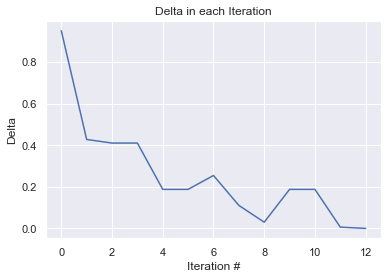

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(delta_records)
plt.xlabel("Iteration #")
plt.ylabel("Delta")
plt.title("Delta in each Iteration")
plt.show()

# print(delta_records)